In [168]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, log_loss
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from joblib import Parallel, delayed
from imblearn.under_sampling import RandomUnderSampler

In [169]:
def accuracy_n_estimator(n, X_train, y_train, X_test, y_test):
    
    rf_model = Pipeline([("preprocessor", preprocesamiento), ("model", RandomForestClassifier(n_estimators=n,random_state=42,n_jobs=-1))])
    # Usar validación cruzada en el conjunto de entrenamiento para obtener el log-loss
    train_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)
    
 # Calcular la media de los scores en el conjunto de entrenamiento
    mean_train_score = np.mean(train_scores)
    
    # Ajustar el pipeline a los datos completos de entrenamiento
    rf_model.fit(X_train, y_train)
    
    # Predecir probabilidades en el conjunto de prueba
    y_test_pred_proba = rf_model.predict(X_test)
    
    # Calcular el log-loss en el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_test_pred_proba)
    
    return mean_train_score, test_accuracy
 
def accuracy_leaf(n, X_train, y_train, X_test, y_test):
   
   rf_model = Pipeline([("preprocessor", preprocesamiento), ("model", RandomForestClassifier(max_leaf_nodes=n,random_state=42,n_jobs=-1))])
   # Usar validación cruzada en el conjunto de entrenamiento para obtener el log-loss
   train_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)
   
# Calcular la media de los scores en el conjunto de entrenamiento
   mean_train_score = np.mean(train_scores)
   
   # Ajustar el pipeline a los datos completos de entrenamiento
   rf_model.fit(X_train, y_train)
   
   # Predecir probabilidades en el conjunto de prueba
   y_test_pred_proba = rf_model.predict(X_test)
   y_train_pred_proba = rf_model.predict(X_train)
   
   # Calcular el log-loss en el conjunto de prueba
   test_accuracy = accuracy_score(y_test, y_test_pred_proba)
   
   return mean_train_score, test_accuracy

def accuracy_depth(n, X_train, y_train, X_test, y_test):
   
   rf_model = Pipeline([("preprocessor", preprocesamiento), ("model", RandomForestClassifier(max_depth=n,random_state=42,n_jobs=-1))])
   # Usar validación cruzada en el conjunto de entrenamiento para obtener el log-loss
   train_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)
   
# Calcular la media de los scores en el conjunto de entrenamiento
   mean_train_score = np.mean(train_scores)
   
   # Ajustar el pipeline a los datos completos de entrenamiento
   rf_model.fit(X_train, y_train)
   
   # Predecir probabilidades en el conjunto de prueba
   y_test_pred_proba = rf_model.predict(X_test)
   
   # Calcular el log-loss en el conjunto de prueba
   test_accuracy = accuracy_score(y_test, y_test_pred_proba)
   
   return mean_train_score, test_accuracy

def loss_depth(n, X_train, y_train, X_test, y_test):
    # Crear el pipeline con el preprocesamiento y el modelo
    rf_model = Pipeline([
        ("preprocessor", preprocesamiento),  # Preprocesamiento
        ("model", RandomForestClassifier(max_depth=n, random_state=42, n_jobs=-1))
    ])
    
    # Entrenar el pipeline
    rf_model.fit(X_train, y_train)
    
    # Predecir las probabilidades para el conjunto de entrenamiento y prueba
    y_train_pred_proba = rf_model.predict_proba(X_train)
    y_test_pred_proba = rf_model.predict_proba(X_test)
    
    # Calcular log-loss para el conjunto de entrenamiento y prueba
    train_loss = log_loss(y_train, y_train_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)
    
    return train_loss, test_loss
 
def loss_n_estimators(n, X_train, y_train, X_test, y_test):
    # Crear el pipeline con el preprocesamiento y el modelo
    rf_model = Pipeline([
        ("preprocessor", preprocesamiento),  # Preprocesamiento
        ("model", RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1))
    ])
    
    # Entrenar el pipeline
    rf_model.fit(X_train, y_train)
    
    # Predecir las probabilidades para el conjunto de entrenamiento y prueba
    y_train_pred_proba = rf_model.predict_proba(X_train)
    y_test_pred_proba = rf_model.predict_proba(X_test)
    
    # Calcular log-loss para el conjunto de entrenamiento y prueba
    train_loss = log_loss(y_train, y_train_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)
    
    return train_loss, test_loss
 
def loss_max_leaf_nodes(n, X_train, y_train, X_test, y_test):
    # Crear el pipeline con el preprocesamiento y el modelo
    rf_model = Pipeline([
        ("preprocessor", preprocesamiento),  # Preprocesamiento
        ("model", RandomForestClassifier(max_leaf_nodes=n, random_state=42, n_jobs=-1))
    ])
    
    # Entrenar el pipeline
    rf_model.fit(X_train, y_train)
    
    # Predecir las probabilidades para el conjunto de entrenamiento y prueba
    y_train_pred_proba = rf_model.predict_proba(X_train)
    y_test_pred_proba = rf_model.predict_proba(X_test)
    
    # Calcular log-loss para el conjunto de entrenamiento y prueba
    train_loss = log_loss(y_train, y_train_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)
    
    return train_loss, test_loss

def bias_variance_depth(n, X_train, y_train, X_test, y_test):
   
   rf_model = Pipeline([("preprocessor", preprocesamiento), ("model", RandomForestClassifier(max_depth=n,random_state=42,n_jobs=-1))])

   # Ajustar el pipeline a los datos completos de entrenamiento
   rf_model.fit(X_train, y_train)
   
   # Predecir probabilidades en el conjunto de prueba
   y_pred_test = rf_model.predict(X_test)
   y_pred_train = rf_model.predict(X_train)
   # Calcular el log-loss en el conjunto de prueba
   variance = 1-accuracy_score(y_test, y_pred_test)
   bias_sqrd = (1-accuracy_score(y_train,y_pred_train))**2
   
   return variance,bias_sqrd

def bias_variance_n_estimator(n, X_train, y_train, X_test, y_test):
   
   rf_model = Pipeline([("preprocessor", preprocesamiento), ("model", RandomForestClassifier(n_estimators=n,random_state=42,n_jobs=-1))])

   # Ajustar el pipeline a los datos completos de entrenamiento
   rf_model.fit(X_train, y_train)
   
   # Predecir probabilidades en el conjunto de prueba
   y_pred_test = rf_model.predict(X_test)
   y_pred_train = rf_model.predict(X_train)
   # Calcular el log-loss en el conjunto de prueba
   variance = 1-accuracy_score(y_test, y_pred_test)
   bias_sqrd = (1-accuracy_score(y_train,y_pred_train))**2
   
   return variance,bias_sqrd

def bias_variance_leaf(n, X_train, y_train, X_test, y_test):
   
   rf_model = Pipeline([("preprocessor", preprocesamiento), ("model", RandomForestClassifier(max_leaf_nodes=n,random_state=42,n_jobs=-1))])

   # Ajustar el pipeline a los datos completos de entrenamiento
   rf_model.fit(X_train, y_train)
   
   # Predecir probabilidades en el conjunto de prueba
   y_pred_test = rf_model.predict(X_test)
   y_pred_train = rf_model.predict(X_train)
   # Calcular el log-loss en el conjunto de prueba
   variance = 1-accuracy_score(y_test, y_pred_test)
   bias_sqrd = (1-accuracy_score(y_train,y_pred_train))**2
   
   return variance,bias_sqrd

In [170]:
df = pd.read_csv("bank-additional-full.csv", sep=';')
print(df.y.value_counts())




y
no     36548
yes     4640
Name: count, dtype: int64


In [171]:
dfy = df["y"].map({"no":0, "yes":1})
dfx = df.drop("y", axis=1)
rus = RandomUnderSampler(random_state=0)
dfx, dfy = rus.fit_resample(dfx,dfy)

In [172]:

caracteristicas_numericas = ["age", "campaign","duration", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx","euribor3m", "nr.employed"]

caracteristicas_categoricas = ["job", "marital", "education","default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

preprocesamiento = ColumnTransformer([("numericos", "passthrough", caracteristicas_numericas), ("categoricas", OneHotEncoder( handle_unknown="ignore"),caracteristicas_categoricas)])


In [173]:
rf_model = Pipeline([("preprocessor", preprocesamiento), ("model", RandomForestClassifier())])

X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=42)


In [174]:
n_estimators_range = np.arange(1,41,1)

train_loss_n_estimators = []
test_loss_n_estimators = []

# Usar joblib.Parallel para paralelizar la ejecución del bucle
results = Parallel(n_jobs=-1)(delayed(loss_n_estimators)(n, X_train, y_train, X_test, y_test) for n in n_estimators_range)

# Desempaquetar los resultados
train_loss_n_estimators, test_loss_n_estimators = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
train_loss_n_estimators = list(train_loss_n_estimators)
test_loss_n_estimators = list(test_loss_n_estimators)

In [175]:
max_depth_range = np.arange(1,41,1)

train_loss_depth = []
test_loss_depth = []

# Usar joblib.Parallel para paralelizar la ejecución del bucle
results = Parallel(n_jobs=-1)(delayed(loss_depth)(n, X_train, y_train, X_test, y_test) for n in max_depth_range)

# Desempaquetar los resultados
train_loss_depth, test_loss_depth = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
train_loss_depth = list(train_loss_depth)
test_loss_depth = list(test_loss_depth)

In [176]:
max_leaf_nodes_range = np.arange(2,42,1)

train_loss_leaf = []
test_loss_leaf = []

# Usar joblib.Parallel para paralelizar la ejecución del bucle
results = Parallel(n_jobs=-1)(delayed(loss_max_leaf_nodes)(n, X_train, y_train, X_test, y_test) for n in max_leaf_nodes_range)

# Desempaquetar los resultados
train_loss_leaf, test_loss_leaf = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
train_loss_leaf = list(train_loss_leaf)
test_loss_leaf = list(test_loss_leaf)

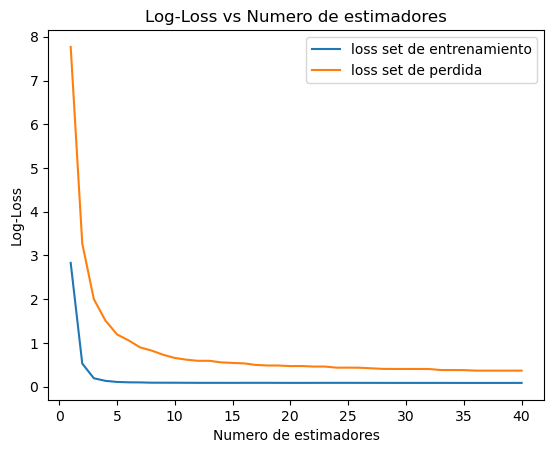

In [177]:
plt.figure()
plt.plot(n_estimators_range, train_loss_n_estimators, label='loss set de entrenamiento')
plt.plot(n_estimators_range, test_loss_n_estimators, label='loss set de perdida')

# Añadir etiquetas y título
plt.xlabel('Numero de estimadores')
plt.ylabel('Log-Loss')
plt.title('Log-Loss vs Numero de estimadores')
plt.legend()

# Mostrar la gráfica
plt.show()

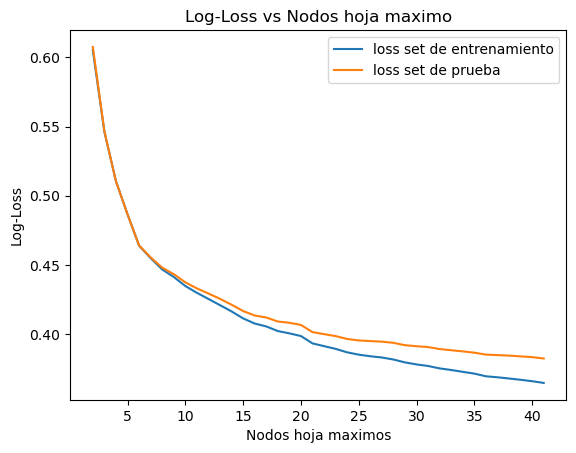

In [178]:
plt.figure()
plt.plot(max_leaf_nodes_range, train_loss_leaf, label='loss set de entrenamiento')
plt.plot(max_leaf_nodes_range, test_loss_leaf, label='loss set de prueba')

# Añadir etiquetas y título
plt.xlabel('Nodos hoja maximos')
plt.ylabel('Log-Loss')
plt.title('Log-Loss vs Nodos hoja maximo')
plt.legend()

# Mostrar la gráfica
plt.show()

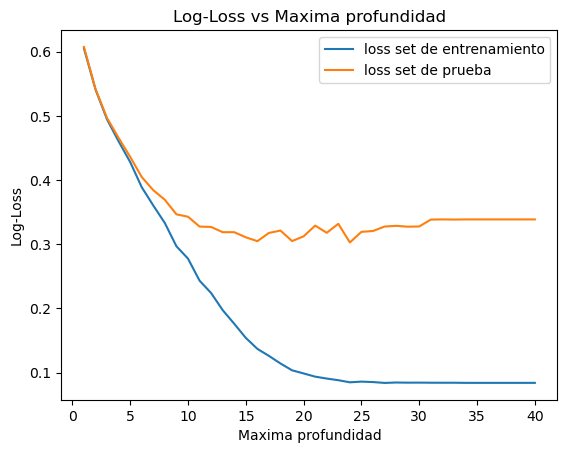

In [179]:
plt.figure()
plt.plot(max_depth_range, train_loss_depth, label='loss set de entrenamiento')
plt.plot(max_depth_range, test_loss_depth, label='loss set de prueba')

# Añadir etiquetas y título
plt.xlabel('Maxima profundidad')
plt.ylabel('Log-Loss')
plt.title('Log-Loss vs Maxima profundidad')
plt.legend()

# Mostrar la gráfica
plt.show()

In [180]:
# Inicializar listas para almacenar las varianzas
var_train_n_estimators = []
var_test_n_estimators = []

results = Parallel(n_jobs=-1)(delayed(accuracy_n_estimator)(n, X_train, y_train, X_test, y_test) for n in n_estimators_range)

# Desempaquetar los resultados
var_train_n_estimators, var_test_n_estimators = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
var_train_n_estimators = list(var_train_n_estimators)
var_test_n_estimators = list(var_test_n_estimators)

In [181]:
# Inicializar listas para almacenar las varianzas
var_train_leaf = []
var_test_leaf = []

results = Parallel(n_jobs=-1)(delayed(accuracy_leaf)(n, X_train, y_train, X_test, y_test) for n in max_leaf_nodes_range)

# Desempaquetar los resultados
var_train_leaf, var_test_leaf = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
var_train_leaf = list(var_train_leaf)
var_test_leaf = list(var_test_leaf)

In [182]:
# Inicializar listas para almacenar las varianzas
var_train_depth = []
var_test_depth = []

results = Parallel(n_jobs=-1)(delayed(accuracy_depth)(n, X_train, y_train, X_test, y_test) for n in max_depth_range)

# Desempaquetar los resultados
var_train_depth, var_test_depth = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
var_train_depth = list(var_train_depth)
var_test_depth = list(var_test_depth)

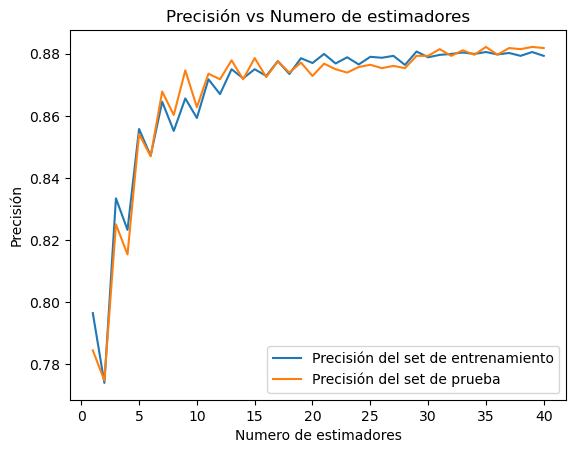

In [183]:
plt.figure()
plt.plot(n_estimators_range, var_train_n_estimators, label='Precisión del set de entrenamiento')
plt.plot(n_estimators_range, var_test_n_estimators, label='Precisión del set de prueba')

plt.xlabel('Numero de estimadores')
plt.ylabel('Precisión')
plt.title('Precisión vs Numero de estimadores')
plt.legend()
plt.show()

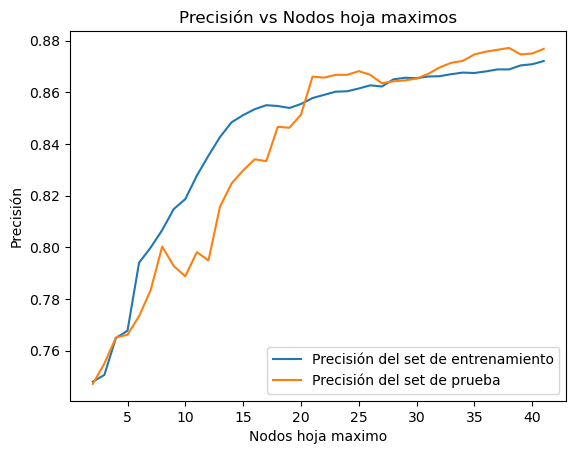

In [184]:
plt.figure()
plt.plot(max_leaf_nodes_range, var_train_leaf, label='Precisión del set de entrenamiento')
plt.plot(max_leaf_nodes_range, var_test_leaf, label='Precisión del set de prueba')

plt.xlabel('Nodos hoja maximo')
plt.ylabel('Precisión')
plt.title('Precisión vs Nodos hoja maximos')
plt.legend()
plt.show()

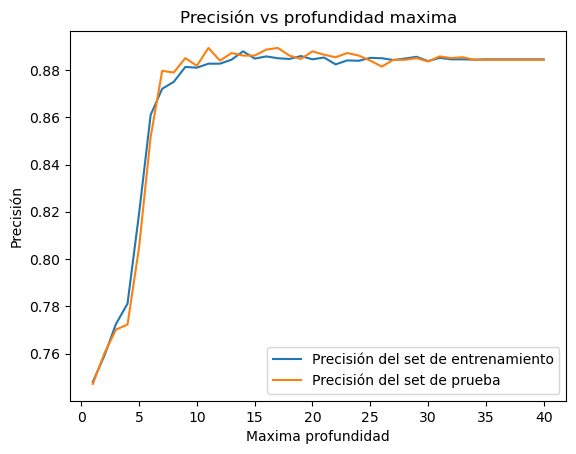

In [185]:
plt.figure()
plt.plot(max_depth_range, var_train_depth, label='Precisión del set de entrenamiento')
plt.plot(max_depth_range, var_test_depth, label='Precisión del set de prueba')

plt.xlabel('Maxima profundidad')
plt.ylabel('Precisión')
plt.title('Precisión vs profundidad maxima')
plt.legend()
plt.show()

In [186]:
# Inicializar listas para almacenar las varianzas
bias_leaf = []
variance_leaf = []

results = Parallel(n_jobs=-1)(delayed(bias_variance_leaf)(n, X_train, y_train, X_test, y_test) for n in max_leaf_nodes_range)

# Desempaquetar los resultados
variance_leaf, bias_leaf = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
bias_leaf = list(bias_leaf)
variance_leaf = list(variance_leaf)

In [187]:
# Inicializar listas para almacenar las varianzas
bias_depth = []
variance_depth = []

results = Parallel(n_jobs=-1)(delayed(bias_variance_depth)(n, X_train, y_train, X_test, y_test) for n in max_depth_range)

# Desempaquetar los resultados
variance_depth, bias_depth = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
bias_depth = list(bias_depth)
variance_depth = list(variance_depth)

In [188]:
# Inicializar listas para almacenar las varianzas
bias_n_estimators = []
variance_n_estimators = []

results = Parallel(n_jobs=-1)(delayed(bias_variance_n_estimator)(n, X_train, y_train, X_test, y_test) for n in n_estimators_range)

# Desempaquetar los resultados
variance_n_estimators, bias_n_estimators = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
bias_n_estimators = list(bias_n_estimators)
variance_n_estimators = list(variance_n_estimators)

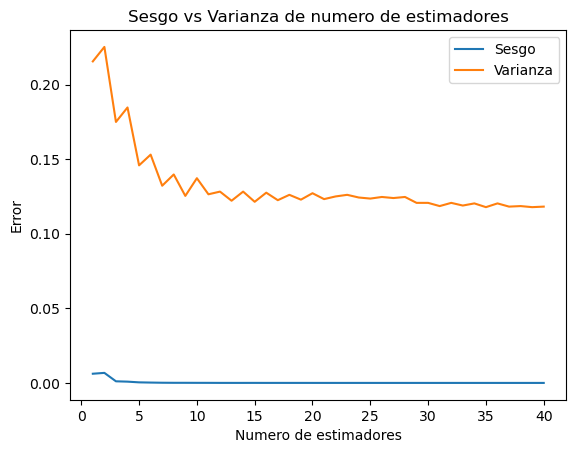

In [189]:
plt.figure()
plt.plot(n_estimators_range, bias_n_estimators, label='Sesgo')
plt.plot(n_estimators_range, variance_n_estimators, label='Varianza')

plt.xlabel('Numero de estimadores')
plt.ylabel('Error')
plt.title('Sesgo vs Varianza de numero de estimadores')
plt.legend()
plt.show()

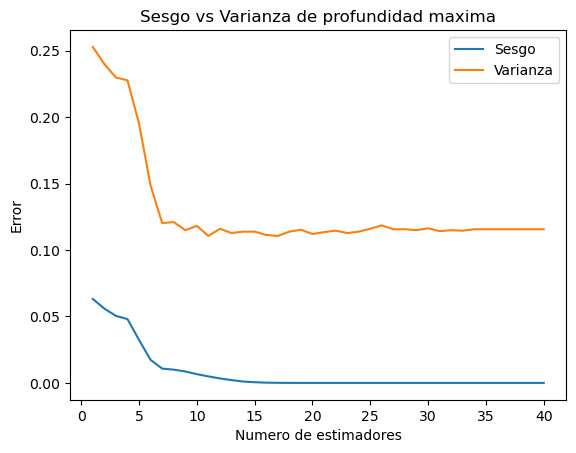

In [190]:
plt.figure()
plt.plot(max_depth_range, bias_depth, label='Sesgo')
plt.plot(max_depth_range, variance_depth, label='Varianza')

plt.xlabel('Numero de estimadores')
plt.ylabel('Error')
plt.title('Sesgo vs Varianza de profundidad maxima')
plt.legend()
plt.show()

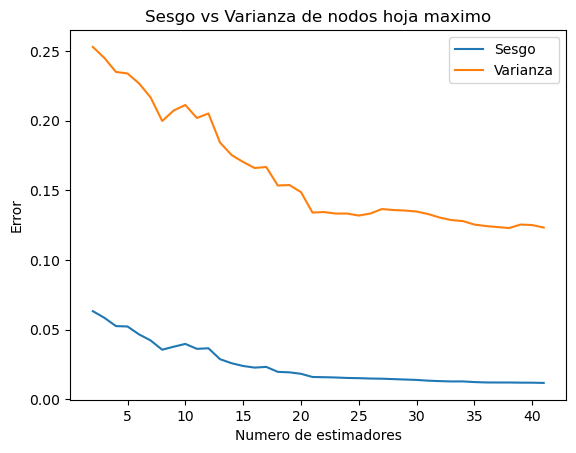

In [191]:
plt.figure()
plt.plot(max_leaf_nodes_range, bias_leaf, label='Sesgo')
plt.plot(max_leaf_nodes_range, variance_leaf, label='Varianza')

plt.xlabel('Numero de estimadores')
plt.ylabel('Error')
plt.title('Sesgo vs Varianza de nodos hoja maximo')
plt.legend()
plt.show()

In [198]:
rf_model = Pipeline([("preprocessor", preprocesamiento), ("model", RandomForestClassifier())])


In [199]:
gs = GridSearchCV(rf_model, {"model__max_depth": [10, 17], "model__n_estimators": [150, 200], "model__max_leaf_nodes": [10, 17]}, 
                  n_jobs=-1, cv=5, scoring='recall')

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numericos',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'campaign',
                                                                          'duration',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m',
                                                                          'nr.employed']),
                                                                        ('categoricas',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'poutcome'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 17],
                         'model__max_leaf_nodes': [10, 17],
                         'model__n_estimators': [150, 200]},
             scoring='recall')

In [200]:
print(gs.best_params_)
print(gs.best_score_)
resultados = pd.DataFrame.from_dict(gs.cv_results_)
resultados

{'model__max_depth': 10, 'model__max_leaf_nodes': 17, 'model__n_estimators': 150}
0.8721205246366537


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_leaf_nodes,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.711903,0.105604,0.075908,0.011750,10,10,150,"{'model__max_depth': 10, 'model__max_leaf_node...",0.743472,0.815668,0.831029,0.853846,0.826154,0.814034,0.037423,7
1,1.808778,0.022173,0.079448,0.018161,10,10,200,"{'model__max_depth': 10, 'model__max_leaf_node...",0.858679,0.820276,0.840246,0.803077,0.767692,0.817994,0.031332,6
2,1.256682,0.156815,0.067608,0.024131,10,17,150,"{'model__max_depth': 10, 'model__max_leaf_node...",0.867896,0.852535,0.887865,0.886154,0.866154,0.872121,0.013281,1
3,1.557655,0.137013,0.074062,0.011765,10,17,200,"{'model__max_depth': 10, 'model__max_leaf_node...",0.887865,0.840246,0.878648,0.880000,0.843077,0.865967,0.020114,2
4,1.192644,0.135800,0.067636,0.021422,17,10,150,"{'model__max_depth': 17, 'model__max_leaf_node...",0.700461,0.714286,0.820276,0.852308,0.696923,0.756851,0.065906,8
5,1.569686,0.215188,0.105555,0.058363,17,10,200,"{'model__max_depth': 17, 'model__max_leaf_node...",0.794163,0.835637,0.804916,0.850769,0.826154,0.822328,0.020480,5
6,1.271905,0.093158,0.064730,0.012807,17,17,150,"{'model__max_depth': 17, 'model__max_leaf_node...",0.870968,0.835637,0.849462,0.835385,0.858462,0.849983,0.013649,4
7,1.575193,0.091449,0.050654,0.008200,17,17,200,"{'model__max_depth': 17, 'model__max_leaf_node...",0.841782,0.847926,0.827957,0.881538,0.855385,0.850918,0.017761,3


In [201]:
rf_model.set_params(**gs.best_params_)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8401580459770115

In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1397
           1       0.84      0.84      0.84      1387

    accuracy                           0.84      2784
   macro avg       0.84      0.84      0.84      2784
weighted avg       0.84      0.84      0.84      2784



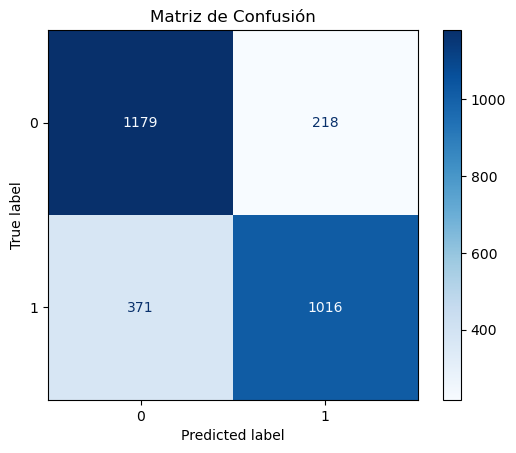

In [197]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()